In [33]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Type of Distributions
Note : Before we dive deep into this topic, i hope you already know well about theory of probability. if you have not, you may consider to learn about probability first since this topic will required probability. 
- Table of contents :
1. Differences between likelihood and probability.
2. Binomial Distribution.
3. Poisson Distribution.
4. Exponential Distribution.
5. Normal Distribution.
6. Other Distributions.

## 1. Likelihood vs Probability
we usually think that likelihood is a same thing as probability, but in statistics there is a subtle difference between likelihood and probability. for example, given you have a data and you want to calculate the probability of specific observations in your data, so the first thing to do is to visualize your data distribution commonly with histograms. after we visualize it, we want to know which type of distribution of our data refers to, it can be (normal, poisson, uniform, binomial, exponential, or  etc). after we know what the distribution is, we have to find the parameters of the distribution in order to calculate the probability. finding the parameters of the distribution given the observations in our data refers to likelihood. After we successfully finding the parameters, now we can calculate the probablity which is the area under the pdf or pms function. the following is the mathematical equation for likelihood and probability :

- Likelihood Function :

$$ \large{Likelihood(paramaters|observation)}$$

- Probability Function :

$$ \large{Probability(observation|parameters)}$$

For a better explanation you can visit this link :
- https://stats.stackexchange.com/questions/2641/what-is-the-difference-between-likelihood-and-probability
- https://www.statology.org/likelihood-vs-probability/
- https://www.youtube.com/watch?v=pYxNSUDSFH4&ab_channel=StatQuestwithJoshStarmer

## 2. Binomial Distribution.
Binomial Distribution is a discrete distribution that describes distribution of number of succesful event occurs given p (succes probability) and number of trial. For example, a fair coin toss with n trial and we would like to calculate the probability number of head occurs given p = 0.5 and n = 50. The following are the pmf,cdf, expectation, and variance of binomial distribution.

- PMF (Probability Mass Function).
$$ \large{f(x|(n,p)) = \dbinom{n}{x} (p)^{x} (1 - p)^{n-x}}$$
- CDF (Cummulative Probability Function).
$$ \large{F(x|(n,p)) = \sum_{x = 0}^{n}\dbinom{n}{x} (p)^{x} (1 - p)^{n-x}}$$
- Expectation.
$$ \large{E[Binomial] = np} $$
- Variance.
$$ \large{Var[Binomial] = np(1-p)}$$

Expectation = 25.0
Variance = 12.5
Standard Deviation = 3.5355339059327378
Visualization :


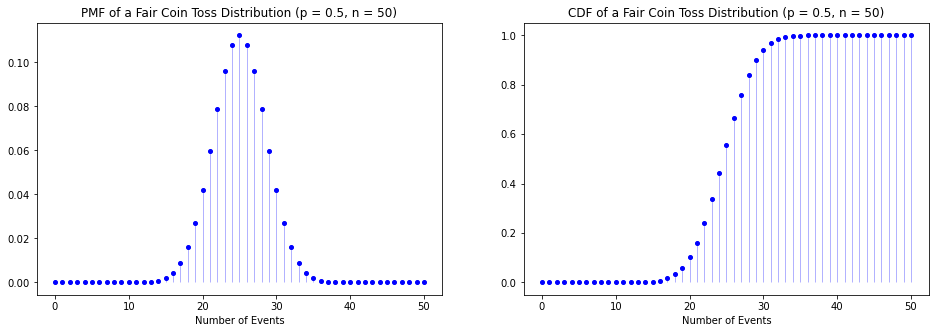

In [30]:
n = 50 
p = 0.5
mean, var = stats.binom.stats(n, p)
print(f'Expectation = {mean}')
print(f'Variance = {var}')
print(f'Standard Deviation = {np.sqrt(var)}')
print('Visualization :')
fig, ax = plt.subplots(1,2,figsize = (16,5))
x = np.arange(0,51)
ax[0].plot(x, stats.binom.pmf(x, n, p), 'bo', ms=4, label='binom pmf')
ax[0].vlines(x, 0, stats.binom.pmf(x, n, p), colors='b', lw=1, alpha=0.3)
ax[0].set_title('PMF of a Fair Coin Toss Distribution (p = 0.5, n = 50)')
ax[0].set_xlabel('Number of Events')

ax[1].plot(x, stats.binom.cdf(x, n, p), 'bo', ms=4, label='binom cdff')
ax[1].vlines(x, 0, stats.binom.cdf(x, n, p), colors='b', lw=1, alpha=0.3)
ax[1].set_title('CDF of a Fair Coin Toss Distribution (p = 0.5, n = 50)')
ax[1].set_xlabel('Number of Events')
plt.show()

## 3. Poisson Distribution
Poisson Distribution is a discrete distribution that is used to calculate probabilty of an independent event that occurs in fixed interval time given the rate of the event occurs. in statistics, this process can be called a poisson process. in real life, we can use possion distribution to calculate the probability of (number of customer arrival, number of calls per Hour at a Call Center,etc) in given fixed interval time. There are many type of poisson processes, eg : (homogeneous poisson process, inhomogeneous poisson process, compound poisson process). But now we will only focus on homogeneous poisson process. The following are the pmf, cdf, expectation , and variance of the poisson distribution :

- PMF (Probability Mass Function).
$$ \large{f(x|\lambda) = \frac{(e^{-\lambda t})(\lambda t)^{x}}{x!}}$$
- CDF (Cummulative Probability Function).
$$ \large{F(x|\lambda) = \sum_{x = 0}^{\infty}\frac{(e^{-\lambda t})(\lambda t)^{x}}{x!}}$$
- Expectation.
$$\large{ E[Poisson] = \lambda} $$
- Variance.
$$\large{ Var[Poisson] = \lambda} $$

Given the rate of customer arrival is 4 people per hour, what is the probability of 10 people arrived in 2 hours and visualize the distribution !
Probability of 10 people arrived in 2 hours is 0.09926153383153544


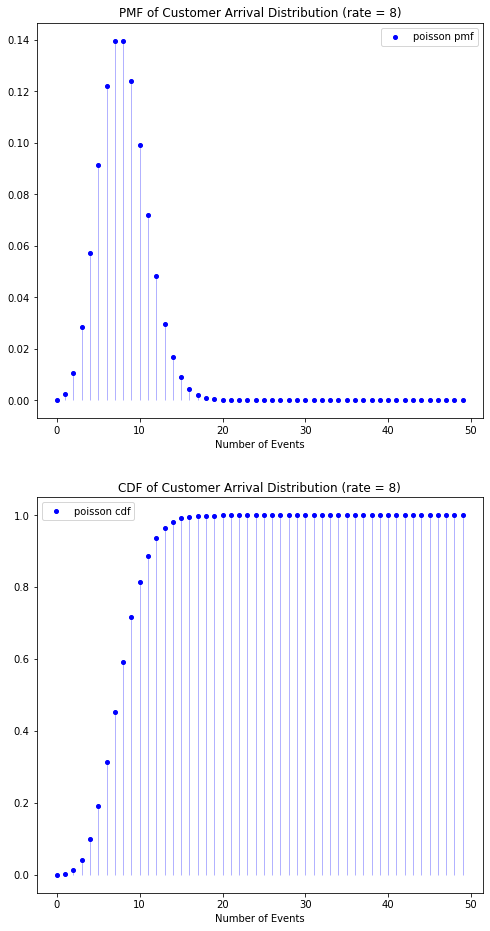

In [78]:
print('Given the rate of customer arrival is 4 people per hour, what is the probability of 10 people arrived in 2 hours and visualize the distribution !')
rate = 4*2
mean, var = stats.poisson.stats(rate)
print(f'Probability of 10 people arrived in 2 hours is {stats.poisson.pmf(10, rate)}')
mean, var = stats.poisson.stats(rate)
fig, ax = plt.subplots(2, 1,figsize = (8,16))
x = np.arange(0,50) # it goes to infinity but for this case only to 50
ax[0].plot(x, stats.poisson.pmf(x, rate), 'bo', ms=4, label='poisson pmf')
ax[0].vlines(x, 0, stats.poisson.pmf(x, rate), colors='b', lw=1, alpha=0.3)
ax[0].set_title('PMF of Customer Arrival Distribution (rate = 8)')
ax[0].set_xlabel('Number of Events')
ax[0].legend()
ax[1].plot(x, stats.poisson.cdf(x, rate), 'bo', ms=4, label='poisson cdf')
ax[1].vlines(x, 0, stats.poisson.cdf(x, rate), colors='b', lw=1, alpha=0.3)
ax[1].set_title('CDF of Customer Arrival Distribution (rate = 8)')
ax[1].set_xlabel('Number of Events')
ax[1].legend()
plt.show()
plt.show()

## 4. Exponential Distribution
Exponential distribution is a continuous distribution that is used to find probability of time between event. This distribution is related to poisson distribution where time between events that occur in poisson process is distributed exponential. For example, we want to know the probability of waiting time for the second customer will arrive after the first customer given the rate of customer arrival with fixed time interval. this problem can be solved by exponential distribution since the waiting time between events is distributed exponential. the following are the pdf, cdf, expectation, and variance of exponential distribution :

- PMF (Probability Mass Function).
$$ \large{f(x|\lambda) = \lambda e^{-\lambda t}}$$
- CDF (Cummulative Probability Function).
$$ \large{F(x|\lambda) = 1-e^{-\lambda t}}$$
- Expectation.
$$ \large{E[Exponential] = \frac{1}{\lambda}} $$
- Variance.
$$ \large{Var[Exponential] = \frac{1}{\lambda^2}} $$

Given the rate of customer arrival is 4 people per hour, what is the probability of waiting for the next customer to arrive less than 5 minutes and visualize the distribution !
Probability of waiting for the next customer to arrive less than 5 minutes is 0.28346868942621073
Expectation = 15.0
Variance = 225.0


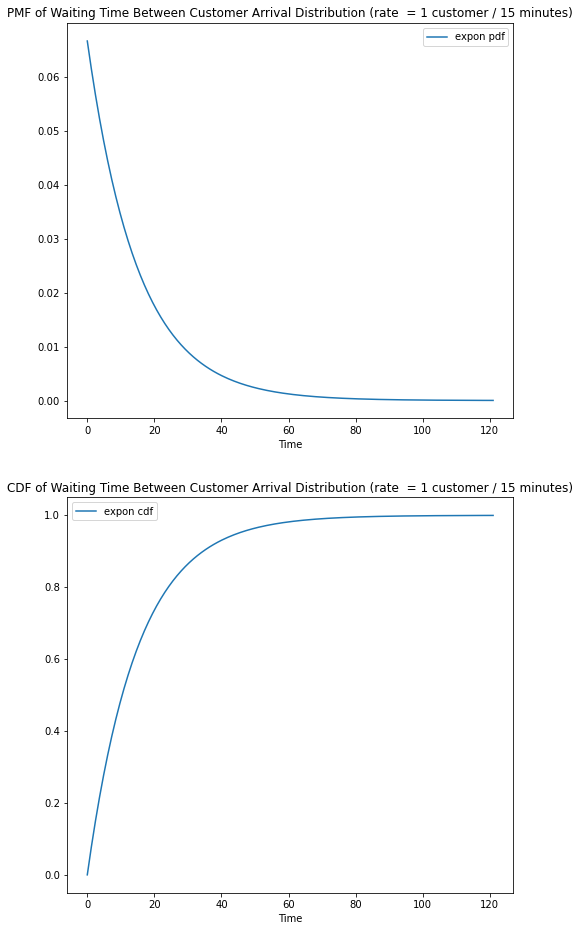

In [81]:
print('Given the rate of customer arrival is 4 people per hour, what is the probability of waiting for the next customer to arrive less than 5 minutes and visualize the distribution !')
rate_ = 4/60
scale_ = 1/rate_
mean, var = stats.expon.stats(scale = scale_)
print(f'Probability of waiting for the next customer to arrive less than 5 minutes is {stats.expon.cdf(5, scale = scale_)}')
print(f'Expectation = {mean}')
print(f'Variance = {var}')
fig, ax  = plt.subplots(2,1,figsize = (8,16))
x = np.linspace(0,121, num = 200) # it goes to infinity but for this case only to 120
ax[0].plot(x, stats.expon.pdf(x, scale = scale_), linestyle = '-', ms=4, label='expon pdf')
ax[0].set_title('PMF of Waiting Time Between Customer Arrival Distribution (rate  = 1 customer / 15 minutes)')
ax[0].set_xlabel('Time')
ax[0].legend()

ax[1].plot(x, stats.expon.cdf(x, scale = scale_), linestyle = '-', ms=4, label='expon cdf')
ax[1].set_title('CDF of Waiting Time Between Customer Arrival Distribution (rate  = 1 customer / 15 minutes)')
ax[1].set_xlabel('Time')
ax[1].legend()
plt.show()

## 5. Normal (Gaussian) Distribution.
Normal (Gaussian) distribution is continuous distribution that shape like a bell and the special about this distribution is symetric from its center, unimodal, asymptotic, and the (mean,median,mode) are equal. Many events in real life naturally follow normal distribution, that's why this distribution is one of the most important distribution to know about. The following is the pdf, cdf, expectation, and variance of normal distribution :

- PMF (Probability Mass Function).
$$ \large{f(x|(\mu,\sigma^2)) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}}$$
- CDF (Cummulative Probability Function (Standard Normal)).
$$ \large{F(x|(0,1)) =  \int_{-\infty}^{x} \frac{e^{-\frac{x}{2}}}{\sqrt{2\pi}}}$$
- Expectation.
$$ \large{E[Normal] = \mu} $$
- Variance.
$$ \large{Var[Normal] = \sigma^2} $$

Given a height distribution follows normal distribution with mu = 150 and var = 15, calculate the probability of people having height over 120 cm?
The probability of people having height over 120 cm is 0.9772498680518208
Expectation = 150.0
Variance = 225.0


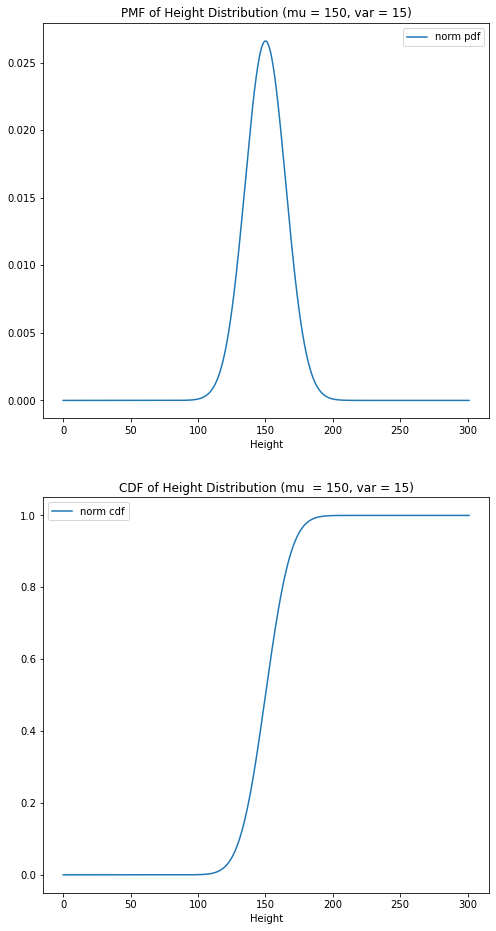

In [82]:
print('Given a height distribution follows normal distribution with mu = 150 and var = 15, calculate the probability of people having height over 120 cm?')
mu_ = 150
scale_ = 15
print(f'The probability of people having height over 120 cm is {1 - stats.norm.cdf(120,loc = mu_, scale = scale_)}')
mean, var = stats.norm.stats(loc = mu_, scale = scale_)
print(f'Expectation = {mean}')
print(f'Variance = {var}')
fig, ax  = plt.subplots(2,1,figsize = (8,16))
x = np.linspace(0,301, num = 800) # it goes to infinity but for this case only to 120
ax[0].plot(x, stats.norm.pdf(x, loc = mu_, scale = scale_), linestyle = '-', ms=4, label='norm pdf')
ax[0].set_title('PMF of Height Distribution (mu = 150, var = 15)')
ax[0].set_xlabel('Height')
ax[0].legend()
ax[1].plot(x, stats.norm.cdf(x,loc = mu_, scale = scale_), linestyle = '-', ms=4, label='norm cdf')
ax[1].set_title('CDF of Height Distribution (mu  = 150, var = 15)')
ax[1].set_xlabel('Height')
ax[1].legend()
plt.show()

## 6.Other Distributions.
Beside the four distributions that we cover previously, in fact there are many kind of distributions that we can find on everday life, such as uniform distribution, lognormal distribution, weibull distribution, etc. Those each distributions has distinct properties and can be used practicaly for solving real life problems. Finally, this is the end of chapter 2 and see you in the next chapter 3. Stay curious and stay thoughtful!